In [34]:
import numpy as np
import matplotlib.pyplot as plt
import functions as fun

#Define the number of lattice sites on x and y
Nx = 60
Ny = 60
#=============================================
#Choose your lattice type
#pR = fun.triangular_lattice( Nx, Ny )
pR = fun.square_lattice( Nx, Ny )
#pR = fun.honeycomb_lattice( Nx, Ny )
#=============================================
#If you want hexagonal boundaries use this function. Otherwise comment it with '#' and set R=pR
#R = fun.hexagonal_boundaries(pR)
R = pR
#=============================================
#If you want to plot the lattice use this function:
#fun.plot_lattice(R)

In [35]:
#Define the integral kernel that solve the heat equation (also called Green's function)
HeatKernel = fun.heat_kernel(R)
#=============================================

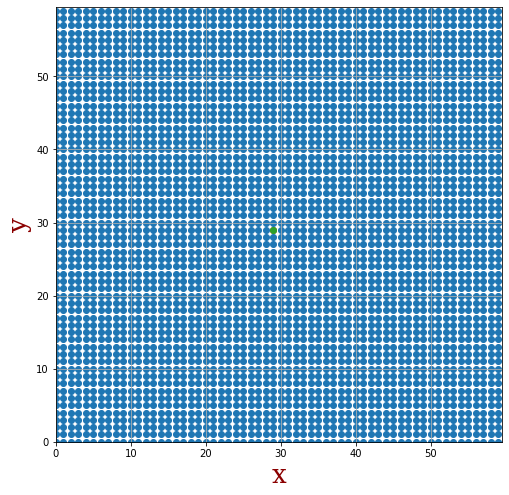

In [36]:
#Choose more or less (it will be approximated to the closest lattice site) 
#a position on the lattice where you want to measure T (molecule position)
X_meas = np.amax(R[:,0])/2.
Y_meas = np.amax(R[:,1])/2.
#Choose a position along Y where to put your laser (the scan will be done along X)
Y_L = np.amax(R[:,1])/2. #Here I set the laser around half-lattice on Y
#=============================================
fun.plot_molecule_position_and_laser_on_lattice(R, X_meas, Y_meas, Y_L)

In [37]:
#Choose a value of \nu , the heat conduction exponent
nu = 2
#=============================================
#Define dimensional parameters
L_tot = 30 #characteristic system size in micron ... it should be something like L_tot > Nx, Ny
dr = L_tot/np.sqrt(Nx*Ny) #in micron
#Define the main control parameter of the heat equation
kappa0 = 0.00155 #heat conductivity in W/(m K)
T0 = 3. #reference temperature of the membrane in Kelvin
P_L = 40 * 0.000000001 #in nWatts
X0 = P_L/kappa0/T0 * 1000000 #in micron
#=============================================
#Choose the value of the laser spatial width (assuming a Gaussian profile for now, in adimensional units)
sigma_L = 1. #in micron

C = 4.*( nu + 1. ) * ( X0/dr )
print(C)
#=============================================
#Make the laser scan along x solving iteratively the heat equation
#arr_X stores the positions of the laser along X (given that it is in Y_L along Y)
#T_meas stores the temperature profile as a function of the laser x-position
#outputs are in adimensional units
arr_X, T_meas = fun.x_laser_scan(R, HeatKernel, X_meas, Y_meas, Y_L, C, nu, sigma_L/dr )
#=============================================

206.45161290322585


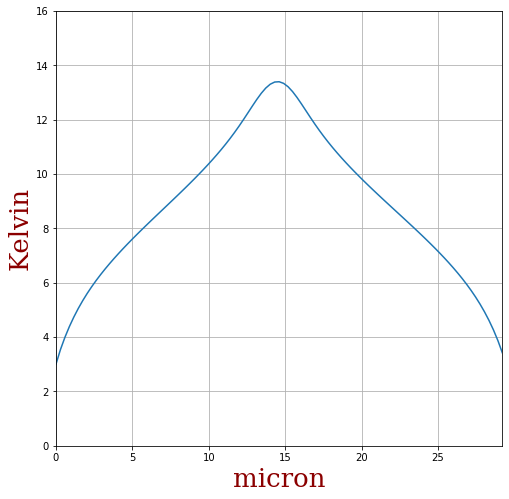

In [38]:
#Plot the temperature profile in dimensional units
Tmax = 16 #in K
fun.plot_dimensional_temperature(dr, arr_X, T_meas, T0, Tmax)